# Laplace filter in frequency domain
## Homework 3, Exercise 2

Your task in the exercise is to match 32 images and average them after matching
to increase the image quality.

You need to replace the `???` in the code with the required commands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def shift_image(img, shift_yx):
    """
    Shift an image img by the amount stored in the shift variables.

    Parameters
    ----------
    img : arraylike
        2D image.
    shift : sequence of 2 ints
        the shifts in y and x direction. 
        They should be given in a list or a tuple.

    Returns
    -------
    shifted_image : arraylike
        2D image shifted with the given shift tuple.
        
    """
    return np.roll(img,shift_yx)

# We implemented the crosscorrelation for you.


def crosscorrelate(imref, imtest):
    """
    Cross-correlate two images with respect to each other. Here we use
    a different implementation for the correlation that uses properties from
    the Fourier space to make it a lot faster. You will learn about this
    properties in the next lectures.

    Parameters
    ----------
    imgref : arraylike
        2D image, the test image is correlated to.
    imtest : arraylike
        2D image, this image is correlated to the reference image.

    Returns
    -------
    crosscorrelation : arraylike
        2D crosscorrelation image
    """
    return np.real(np.fft.ifft2(np.fft.fft2(imref) *
                                np.conj(np.fft.fft2(imtest))))

Load images into a list, make sure that you are in the correct
directory, where the folder for the images is stored.

In [3]:
directory = 'images/'
img_list = [plt.imread(directory + 'flower_%02i.png' % i) for i in range(32)]

First estimate of the object. Because we do not know better, just take the
average over all images. Look up the documentation on the keyword argument
axis of the np.mean function

In [4]:
obj = np.mean(img_list,axis=0)
obj.shape

(432, 648)

Figure for interactive plotting

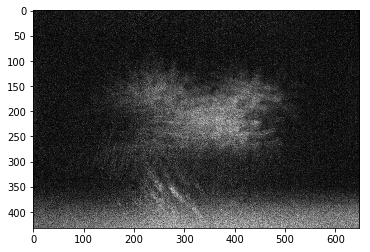

In [5]:
plt.figure(1)
plt.imshow(obj, cmap='gray', interpolation='none', vmin=0, vmax=0.1)

Loop: Do 5 iterations

0


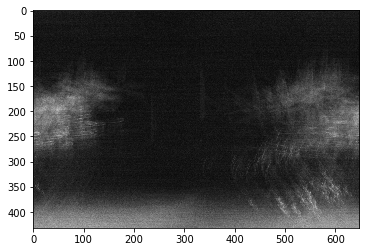

1


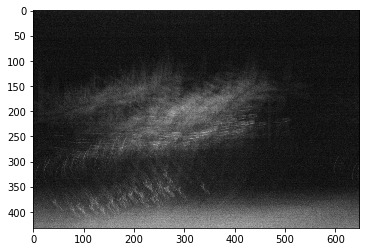

2


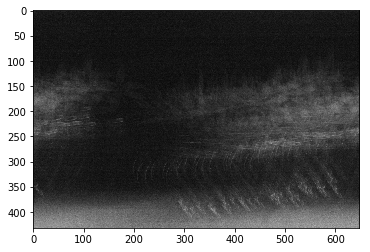

3


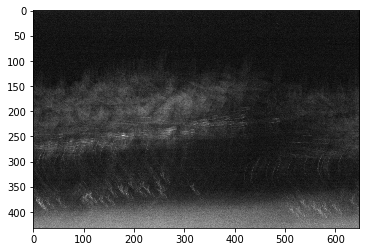

4


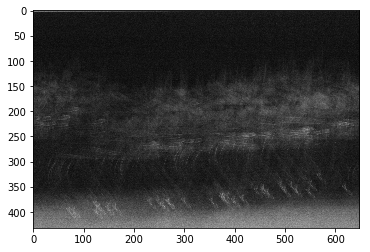

In [6]:
for i in range(5):

    print(i)

    # First step: find the optimal shift

    for k, img in enumerate(img_list):  # Use enumerate here!

        # Calculate the crosscorrelation of the current estimate and the image

        cc = crosscorrelate(obj,img)

        # The maximum of the cross-correlations tells you the displacement

        max_index = int(np.max(cc))
        shift_yx = (max_index,max_index)
        
        # Shift the image in the list of images accordingly

        img_list[k] = shift_image(img, shift_yx)

    # Second step: find a new object estimate
    # Therefore, average over all images to get the new estimate

    obj = np.mean(img_list,axis=0)

    plt.imshow(obj, cmap='gray', interpolation='none', vmin=0, vmax=0.1)

    plt.pause(1.)